In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.shape

(9134, 24)

In [4]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())

In [5]:
data.columns = cols
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [7]:
#Numerical 
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
#Categorical
data.describe(include=[np.object])

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,CH85057,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [9]:
#Check and deal with NaN values.
round(data.isna().sum()/len(data),4)*100

customer                         0.0
state                            0.0
customer lifetime value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective to date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location code                    0.0
marital status                   0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
policy type                      0.0
policy                           0.0
renew offer type                 0.0
sales channel                    0.0
total claim amount               0.0
vehicle class                    0.0
vehicle size                     0.0
dtype: float64

In [10]:
#Datetime format- Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie Jan Feb and March
data['effective to date'] = pd.to_datetime(data['effective to date'], errors='coerce')
data.head(3)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [11]:
list(map(lambda x:x.strftime(format='%B'), data['effective to date']))

['February',
 'January',
 'February',
 'January',
 'February',
 'January',
 'February',
 'January',
 'January',
 'February',
 'February',
 'January',
 'February',
 'January',
 'January',
 'January',
 'February',
 'January',
 'February',
 'January',
 'February',
 'January',
 'January',
 'February',
 'February',
 'January',
 'February',
 'February',
 'February',
 'February',
 'February',
 'January',
 'January',
 'January',
 'February',
 'January',
 'January',
 'February',
 'January',
 'February',
 'January',
 'January',
 'January',
 'February',
 'February',
 'January',
 'January',
 'January',
 'February',
 'January',
 'January',
 'January',
 'February',
 'February',
 'January',
 'February',
 'February',
 'February',
 'January',
 'February',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'February',
 'February',
 'February',
 'February',
 'January',
 'February',
 'February',
 'February',
 'February',
 'February',
 '

In [12]:
#add column from list & check top 3 lines
data['month']=np.array(list(map(lambda x:x.strftime(format='%B'), data['effective to date'])))
data.head(3)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,February
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,January
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,February


In [13]:
#no filter necessary since all data is already in Q1

In [14]:
#Lab 3

In [15]:
#show dataframe info
data.info

<bound method DataFrame.info of      customer       state  customer lifetime value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective to date employmentstatus gender  income  ...  \
0     Bachelor    

In [16]:
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

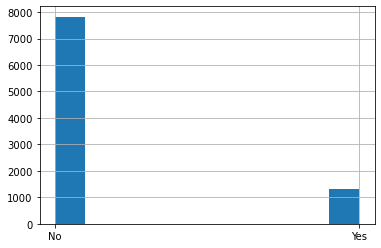

In [18]:
data['response'].hist()
plt.show()

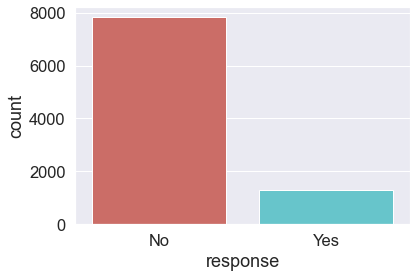

In [19]:
#always find a way to make it prettier and easier to read!!! :)
sns.set(font_scale=1.5)
countplt=sns.countplot(x='response', data=data, palette ='hls')

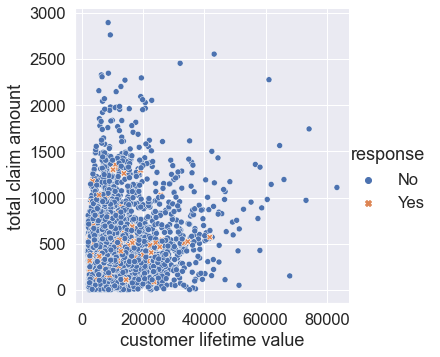

In [20]:
#create scatter, check visually for any correlations
sns.relplot(x="customer lifetime value",y="total claim amount",hue="response", style="response", data=data)
plt.show()

In [21]:
trimmed = data.filter(items=['response', 'sales channel', 'total claim amount', 'income'])

In [22]:
channelxresponse = trimmed.groupby(["sales channel"]).count().sort_values(["response"], ascending=False).reset_index()
channelxresponse.head()

,sales channel,response,total claim amount,income
0,Agent,3477,3477,3477
1,Branch,2567,2567,2567
2,Call Center,1765,1765,1765
3,Web,1325,1325,1325


In [23]:
trimmed.head()

,response,sales channel,total claim amount,income
0,No,Agent,384.811147,56274
1,No,Agent,1131.464935,0
2,No,Agent,566.472247,48767
3,No,Call Center,529.881344,0
4,No,Agent,138.130879,43836


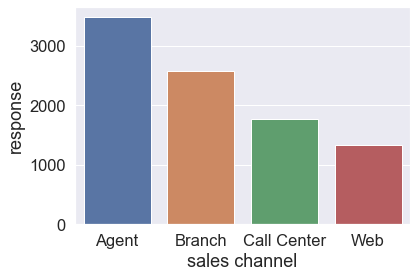

In [24]:
#Show a plot of the response rate by the sales channel.
sns.barplot(x='sales channel',y='response',data=channelxresponse)
plt.show()

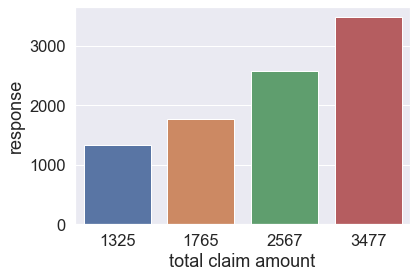

In [25]:
#Show a plot of the response rate by the total claim amount.
sns.barplot(x='total claim amount',y='response',data=channelxresponse)
plt.show()

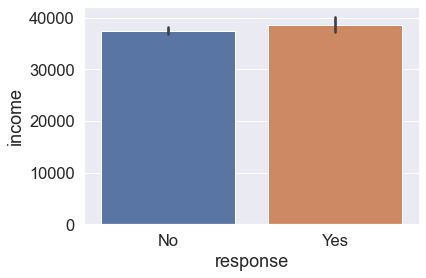

In [26]:
#Show a plot of the response rate by income.
sns.barplot(x='response',y='income',data=trimmed)
plt.show()

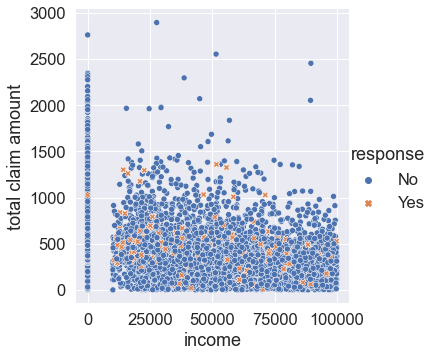

In [27]:
#Show a plot of the response rate by income.
sns.relplot(x="income",y="total claim amount",hue="response", style="response", data=trimmed)
plt.show()

In [28]:
#Lab 4

In [29]:
data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [30]:
#old
#numerical = data._get_numeric_data()
#numerical

In [31]:
numerical = data.describe(include=[np.number])
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [32]:
categoricals = data.describe(include=[np.object])
categoricals


,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,month
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3,2
top,CH85057,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,January
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424,4898


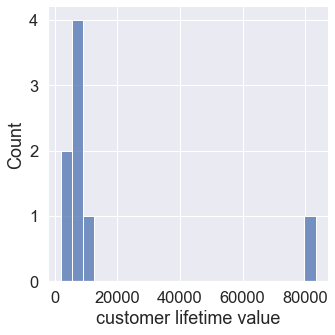

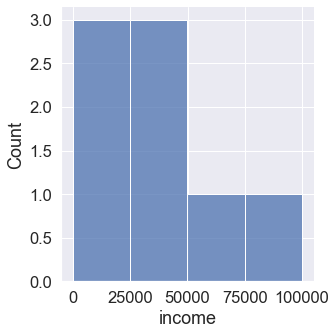

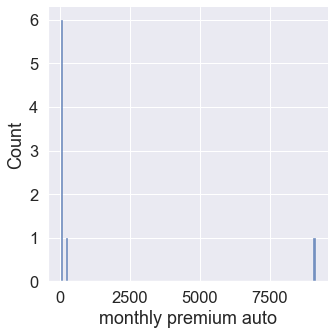

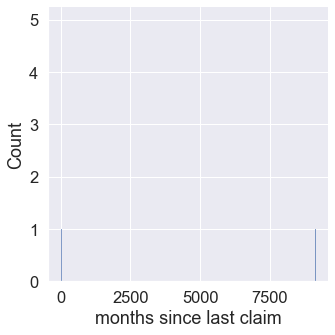

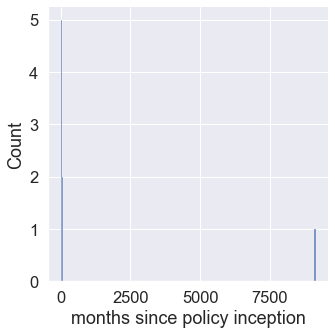

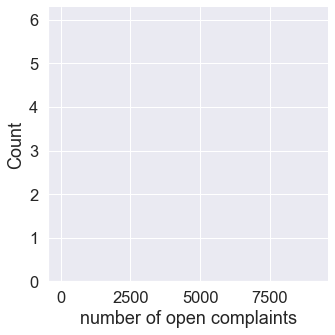

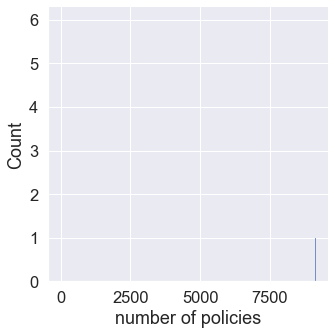

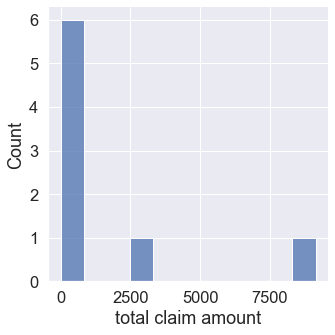

In [33]:
#Use seaborn library to construct distribution plots for the numerical variables
for x in numerical.columns:
    sns.displot(numerical[x])

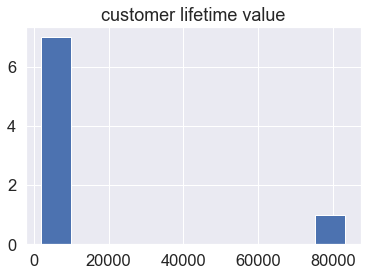

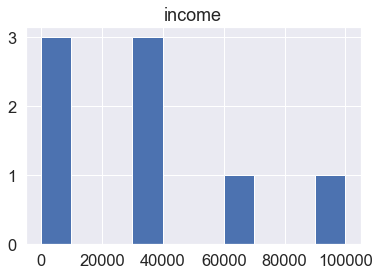

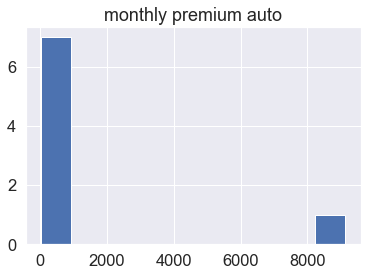

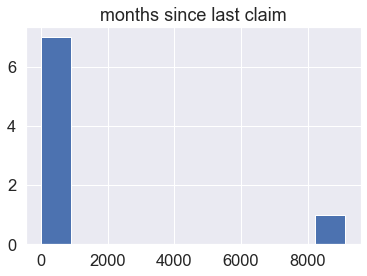

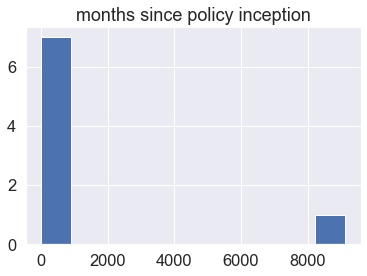

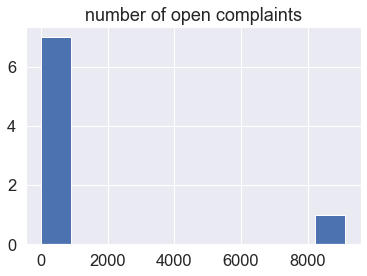

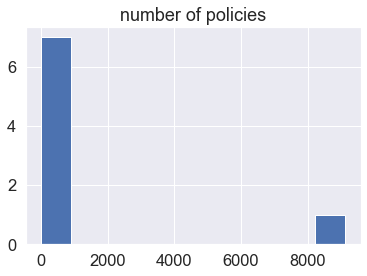

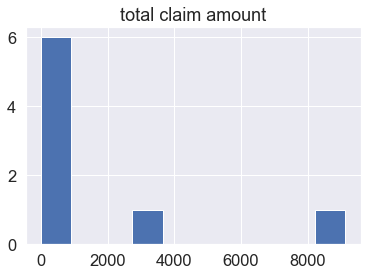

In [34]:
#Use Matplotlib to construct histograms
for x in numerical.columns:
    numerical.hist(x)
plt.show()

In [35]:
#Do the distributions for different numerical variables look like a normal distribution
#Is that a question? If so, then NO

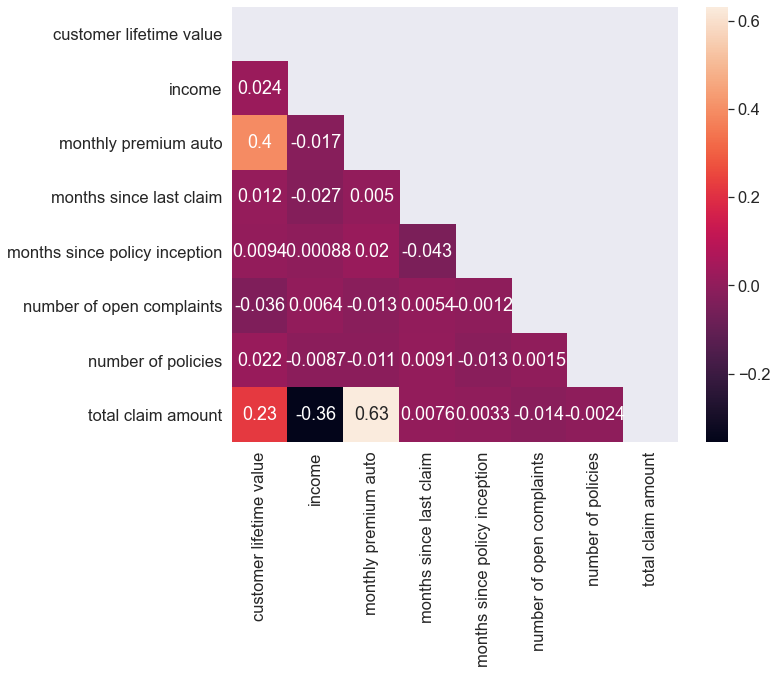

In [36]:
#For the numerical variables, check the multicollinearity between the features.
#Write code for both the correlation matrix and for seaborn heatmap.
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show() 

In [37]:
#Drop one of the two features that show a high correlation between them (greater than 0.9).
#If there is no pair of features that have a high correlation, then do not drop any features

#there are no pair of features that have a high correlation, none dropped

In [38]:
#Lab 5

In [39]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [40]:
#X-y split

In [43]:
numerical.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244


In [66]:
numerical_data = data.select_dtypes(include=[np.number])
numerical_data

#numerical = data._get_numeric_data()
#numerical


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [67]:
y = numerical_data['total claim amount']
numerical_data = numerical_data.drop(['total claim amount'], axis=1)

In [68]:
X_num = numerical_data.select_dtypes(include = np.number)
X_cat = numerical_data.select_dtypes(include = np.object)

In [69]:
#Normalize (numerical).

In [70]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(9134, 7)


In [71]:
pd.DataFrame(x_normalized)

,0,1,2,3,4,5,6
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.000000,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.000000,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.000000,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.000000,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.000000,0.000023
...,...,...,...,...,...,...,...
9129,0.309387,0.950935,0.000965,0.000238,0.001176,0.000000,0.000026
9130,0.141879,0.989876,0.003620,0.000641,0.001283,0.000000,0.000046
9131,0.999935,0.000000,0.010411,0.001102,0.004532,0.000367,0.000245
9132,0.324391,0.945913,0.004139,0.001466,0.000129,0.000000,0.000129


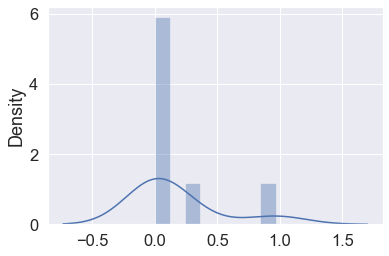

In [72]:
sns.distplot(x_normalized[2])
plt.show()